In [1]:
import pandas as pd

In [2]:
import geopandas as gpd

In [3]:
import contextily as ctx

In [4]:
import matplotlib.pyplot as plt

In [5]:
gdf = gpd.read_file('acs2019_5yr_B15003_14000US06037407102.geojson')

In [6]:
gdf.shape

(2347, 53)

In [7]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2347 non-null   object  
 1   name              2347 non-null   object  
 2   B15003001         2347 non-null   float64 
 3   B15003001, Error  2347 non-null   float64 
 4   B15003002         2347 non-null   float64 
 5   B15003002, Error  2347 non-null   float64 
 6   B15003003         2347 non-null   float64 
 7   B15003003, Error  2347 non-null   float64 
 8   B15003004         2347 non-null   float64 
 9   B15003004, Error  2347 non-null   float64 
 10  B15003005         2347 non-null   float64 
 11  B15003005, Error  2347 non-null   float64 
 12  B15003006         2347 non-null   float64 
 13  B15003006, Error  2347 non-null   float64 
 14  B15003007         2347 non-null   float64 
 15  B15003007, Error  2347 non-null   float64 
 16  B15003008       

In [8]:
list(gdf)

['geoid',
 'name',
 'B15003001',
 'B15003001, Error',
 'B15003002',
 'B15003002, Error',
 'B15003003',
 'B15003003, Error',
 'B15003004',
 'B15003004, Error',
 'B15003005',
 'B15003005, Error',
 'B15003006',
 'B15003006, Error',
 'B15003007',
 'B15003007, Error',
 'B15003008',
 'B15003008, Error',
 'B15003009',
 'B15003009, Error',
 'B15003010',
 'B15003010, Error',
 'B15003011',
 'B15003011, Error',
 'B15003012',
 'B15003012, Error',
 'B15003013',
 'B15003013, Error',
 'B15003014',
 'B15003014, Error',
 'B15003015',
 'B15003015, Error',
 'B15003016',
 'B15003016, Error',
 'B15003017',
 'B15003017, Error',
 'B15003018',
 'B15003018, Error',
 'B15003019',
 'B15003019, Error',
 'B15003020',
 'B15003020, Error',
 'B15003021',
 'B15003021, Error',
 'B15003022',
 'B15003022, Error',
 'B15003023',
 'B15003023, Error',
 'B15003024',
 'B15003024, Error',
 'B15003025',
 'B15003025, Error',
 'geometry']

In [9]:
columns_to_keep= ['geoid',
 'name',
 'B15003001',
 'B15003002',
 'B15003003',
 'B15003004',
 'B15003005',
 'B15003006',
 'B15003007',
 'B15003008',
 'B15003009',
 'B15003010',
 'B15003011',
 'B15003012',
 'B15003013',
 'B15003014',
 'B15003015',
 'B15003016',
 'B15003017',
 'B15003018',
 'B15003019',
 'B15003020',
 'B15003021',
 'B15003022',
 'B15003023',
 'B15003024',
 'B15003025',
 'geometry']

In [10]:
gdf= gdf[columns_to_keep]

In [11]:
gdf.head()

,geoid,name,B15003001,B15003002,B15003003,B15003004,B15003005,B15003006,B15003007,B15003008,...,B15003017,B15003018,B15003019,B15003020,B15003021,B15003022,B15003023,B15003024,B15003025,geometry
0,05000US06037,"Los Angeles County, CA",6886895.0,242811.0,2187.0,3038.0,12811.0,29642.0,63894.0,37551.0,...,1296682.0,122767.0,305982.0,1001003.0,482323.0,1460862.0,522777.0,165612.0,91828.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3118.0,85.0,6.0,0.0,0.0,0.0,6.0,3.0,...,711.0,39.0,228.0,660.0,278.0,486.0,120.0,63.0,60.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",2687.0,1.0,0.0,2.0,0.0,0.0,38.0,0.0,...,650.0,77.0,151.0,495.0,277.0,511.0,257.0,0.0,105.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",4216.0,245.0,0.0,0.0,0.0,31.0,0.0,34.0,...,906.0,90.0,265.0,850.0,449.0,694.0,207.0,34.0,44.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",2646.0,148.0,0.0,0.0,0.0,20.0,24.0,0.0,...,678.0,46.0,107.0,470.0,197.0,404.0,170.0,20.0,27.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [12]:
gdf = gdf.drop([0])

In [13]:
gdf.head()

,geoid,name,B15003001,B15003002,B15003003,B15003004,B15003005,B15003006,B15003007,B15003008,...,B15003017,B15003018,B15003019,B15003020,B15003021,B15003022,B15003023,B15003024,B15003025,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3118.0,85.0,6.0,0.0,0.0,0.0,6.0,3.0,...,711.0,39.0,228.0,660.0,278.0,486.0,120.0,63.0,60.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",2687.0,1.0,0.0,2.0,0.0,0.0,38.0,0.0,...,650.0,77.0,151.0,495.0,277.0,511.0,257.0,0.0,105.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",4216.0,245.0,0.0,0.0,0.0,31.0,0.0,34.0,...,906.0,90.0,265.0,850.0,449.0,694.0,207.0,34.0,44.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",2646.0,148.0,0.0,0.0,0.0,20.0,24.0,0.0,...,678.0,46.0,107.0,470.0,197.0,404.0,170.0,20.0,27.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3263.0,49.0,0.0,0.0,0.0,44.0,0.0,0.0,...,772.0,80.0,185.0,537.0,336.0,519.0,342.0,109.0,49.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [14]:
list(gdf)

['geoid',
 'name',
 'B15003001',
 'B15003002',
 'B15003003',
 'B15003004',
 'B15003005',
 'B15003006',
 'B15003007',
 'B15003008',
 'B15003009',
 'B15003010',
 'B15003011',
 'B15003012',
 'B15003013',
 'B15003014',
 'B15003015',
 'B15003016',
 'B15003017',
 'B15003018',
 'B15003019',
 'B15003020',
 'B15003021',
 'B15003022',
 'B15003023',
 'B15003024',
 'B15003025',
 'geometry']

In [15]:
gdf.columns=['geoid',
 'name',
 'Total',
 'No schooling completed',
 'Nursery school',
 'Kindergarten',
 '1st grade',
 '2nd grade',
 '3rd grade',
 '4th grade',
 '5th grade',
 '6th grade',
 '7th grade',
 '8th grade',
 '9th grade',
 '10th grade',
 '11th grade',
 '12th grade, no diploma',
 'Regular high school diploma',
 'GED or alternative credential',
 'Some college, less than 1 year',
 'Some college, 1 or more years, no degree',
 'Associates degree',
 'Bachelors degree',
 'Masters degree',
 'Professional school degree',
 'Doctorate degree',
 'geometry']

In [16]:
gdf.sample()

,geoid,name,Total,No schooling completed,Nursery school,Kindergarten,1st grade,2nd grade,3rd grade,4th grade,...,Regular high school diploma,GED or alternative credential,"Some college, less than 1 year","Some college, 1 or more years, no degree",Associates degree,Bachelors degree,Masters degree,Professional school degree,Doctorate degree,geometry
1058,14000US06037320202,"Census Tract 3202.02, Los Angeles, CA",3969.0,185.0,7.0,0.0,0.0,29.0,55.0,38.0,...,942.0,139.0,154.0,392.0,305.0,436.0,97.0,11.0,21.0,"MULTIPOLYGON (((-118.44470 34.29387, -118.4435..."


In [17]:
gdf['Percent Less than High School'] = (gdf['No schooling completed'] + gdf['Nursery school'] + gdf['Kindergarten'] + gdf['1st grade'] + gdf['2nd grade'] + gdf['3rd grade'] + gdf['4th grade'] + gdf['5th grade'] + gdf['6th grade'] + gdf['7th grade']+ gdf['8th grade'] + gdf['9th grade'] + gdf['10th grade'] + gdf['11th grade'] + gdf['12th grade, no diploma'])/gdf['Total']*100
gdf['Percent High School Diploma'] = (gdf['Regular high school diploma']+gdf['GED or alternative credential']+gdf['Some college, less than 1 year']+ gdf['Some college, 1 or more years, no degree']+gdf['Associates degree'])/gdf['Total']*100
gdf['Percent Bachelors Degree or Higher'] = (gdf['Bachelors degree']+gdf['Masters degree']+gdf['Professional school degree']+gdf['Doctorate degree'])/gdf['Total']*100

In [18]:
gdf.sample()

,geoid,name,Total,No schooling completed,Nursery school,Kindergarten,1st grade,2nd grade,3rd grade,4th grade,...,"Some college, 1 or more years, no degree",Associates degree,Bachelors degree,Masters degree,Professional school degree,Doctorate degree,geometry,Percent Less than High School,Percent High School Diploma,Percent Bachelors Degree or Higher
308,14000US06037137302,"Census Tract 1373.02, Los Angeles, CA",3382.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,...,412.0,456.0,1199.0,478.0,221.0,58.0,"MULTIPOLYGON (((-118.66816 34.18414, -118.6676...",3.015967,39.148433,57.8356


In [19]:
gdf[['geoid','name','Total','Percent Less than High School', 'Percent High School Diploma','Percent Bachelors Degree or Higher','geometry']]

,geoid,name,Total,Percent Less than High School,Percent High School Diploma,Percent Bachelors Degree or Higher,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3118.0,15.169981,61.449647,23.380372,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",2687.0,6.103461,61.406773,32.489766,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",4216.0,16.057875,60.721063,23.221063,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",2646.0,19.916856,56.613757,23.469388,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3263.0,10.235979,58.535090,31.228930,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."
...,...,...,...,...,...,...,...
2342,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",1088.0,7.996324,77.573529,14.430147,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
2343,14000US06037980033,"Census Tract 9800.33, Los Angeles, CA",16.0,0.000000,100.000000,0.000000,"MULTIPOLYGON (((-118.24897 33.75590, -118.2470..."
2344,14000US06037990100,"Census Tract 9901, Los Angeles, CA",0.0,NaN,NaN,NaN,"MULTIPOLYGON (((-118.95114 33.99643, -118.9505..."
2345,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,NaN,NaN,NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


In [20]:
desired_columns = ['geoid','name','Total','Percent Less than High School', 'Percent High School Diploma','Percent Bachelors Degree or Higher','geometry']

gdf[desired_columns].sample(5)

,geoid,name,Total,Percent Less than High School,Percent High School Diploma,Percent Bachelors Degree or Higher,geometry
1891,14000US06037574602,"Census Tract 5746.02, Los Angeles, CA",1015.0,6.600985,38.719212,54.679803,"MULTIPOLYGON (((-118.11188 33.78139, -118.1118..."
2153,14000US06037800102,"Census Tract 8001.02, Los Angeles, CA",5233.0,1.949169,32.142175,65.908657,"MULTIPOLYGON (((-118.69781 34.07396, -118.6977..."
959,14000US06037294510,"Census Tract 2945.10, Los Angeles, CA",2948.0,52.544098,43.351425,4.104478,"MULTIPOLYGON (((-118.27501 33.79053, -118.2739..."
503,14000US06037201503,"Census Tract 2015.03, Los Angeles, CA",2134.0,32.427366,51.499531,16.073102,"MULTIPOLYGON (((-118.17807 34.08644, -118.1770..."
94,14000US06037113234,"Census Tract 1132.34, Los Angeles, CA",3129.0,24.576542,50.910834,24.512624,"MULTIPOLYGON (((-118.59755 34.22816, -118.5975..."


In [21]:
edu_trimmed = gdf[desired_columns].copy()
edu_trimmed 

,geoid,name,Total,Percent Less than High School,Percent High School Diploma,Percent Bachelors Degree or Higher,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",3118.0,15.169981,61.449647,23.380372,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",2687.0,6.103461,61.406773,32.489766,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",4216.0,16.057875,60.721063,23.221063,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",2646.0,19.916856,56.613757,23.469388,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3263.0,10.235979,58.535090,31.228930,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."
...,...,...,...,...,...,...,...
2342,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",1088.0,7.996324,77.573529,14.430147,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
2343,14000US06037980033,"Census Tract 9800.33, Los Angeles, CA",16.0,0.000000,100.000000,0.000000,"MULTIPOLYGON (((-118.24897 33.75590, -118.2470..."
2344,14000US06037990100,"Census Tract 9901, Los Angeles, CA",0.0,NaN,NaN,NaN,"MULTIPOLYGON (((-118.95114 33.99643, -118.9505..."
2345,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,NaN,NaN,NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


In [22]:
gdf_sorted = gdf.sort_values(by='Percent Less than High School',ascending = False)

In [23]:
gdf_sorted[['name','Percent Less than High School']].head(10)

,name,Percent Less than High School
561,"Census Tract 2089.02, Los Angeles, CA",72.920252
570,"Census Tract 2094.02, Los Angeles, CA",71.440295
704,"Census Tract 2264.10, Los Angeles, CA",67.839859
713,"Census Tract 2283.20, Los Angeles, CA",65.903614
563,"Census Tract 2089.04, Los Angeles, CA",65.180952
1580,"Census Tract 5331.03, Los Angeles, CA",64.115646
736,"Census Tract 2318, Los Angeles, CA",63.416988
707,"Census Tract 2270.10, Los Angeles, CA",63.214526
708,"Census Tract 2270.20, Los Angeles, CA",62.938699
965,"Census Tract 2948.20, Los Angeles, CA",62.737844


<AxesSubplot:xlabel='name'>

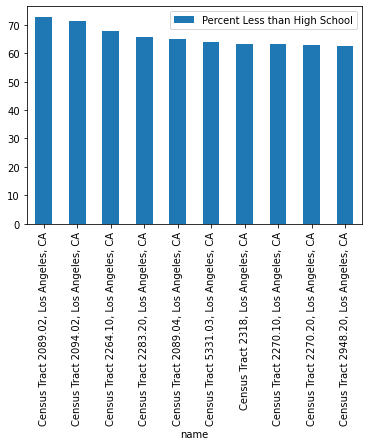

In [25]:
gdf_sorted.head(10).plot.bar(x='name', y='Percent Less than High School')

In [26]:
gdf_sorted1 = gdf.sort_values(by='Total',ascending = False)

In [28]:
gdf_sorted1[['name','Total']].head(10)

,name,Total
923,"Census Tract 2756.02, Los Angeles, CA",9145.0
2147,"Census Tract 7029.01, Los Angeles, CA",8133.0
2198,"Census Tract 9010.04, Los Angeles, CA",8017.0
2206,"Census Tract 9012.05, Los Angeles, CA",7098.0
994,"Census Tract 3006, Los Angeles, CA",7044.0
532,"Census Tract 2060.20, Los Angeles, CA",6889.0
2107,"Census Tract 7002, Los Angeles, CA",6781.0
2236,"Census Tract 9107.05, Los Angeles, CA",6519.0
1938,"Census Tract 5776.03, Los Angeles, CA",6346.0
1844,"Census Tract 5712, Los Angeles, CA",6328.0


<AxesSubplot:title={'center':'Education Attainment in top 10 Census Tracts LA County'}, xlabel='name'>

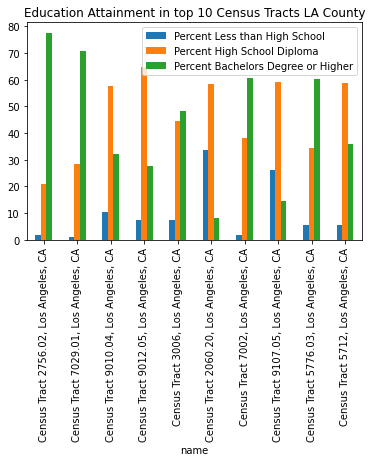

In [32]:
gdf_sorted1.head(10).plot.bar(x='name', y=['Percent Less than High School','Percent High School Diploma','Percent Bachelors Degree or Higher'], title= 'Education Attainment in top 10 Census Tracts LA County')

<AxesSubplot:>

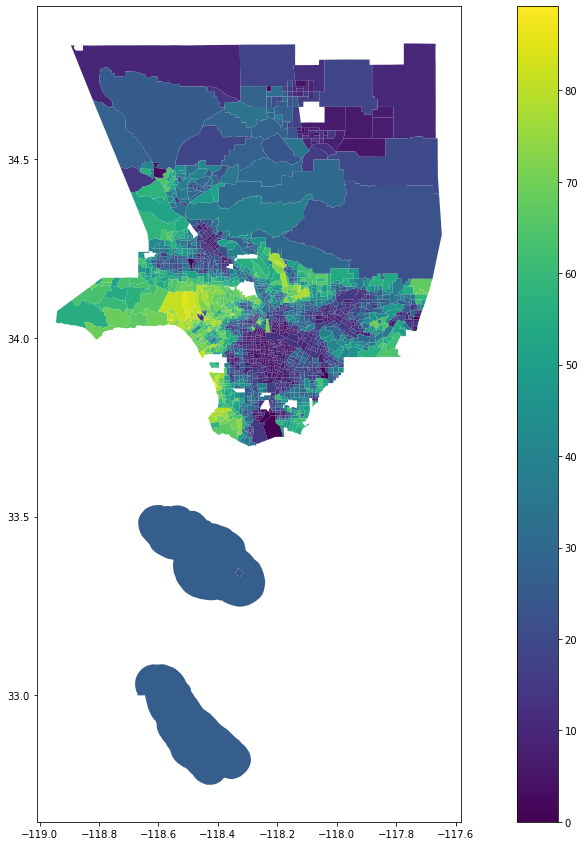

In [37]:
edu_trimmed.plot(
            figsize=(20,15),   
            column = 'Percent Bachelors Degree or Higher',
            legend = True                 
) 

Text(0.5, 1.0, 'Percent Bachelors Degree or Higher')

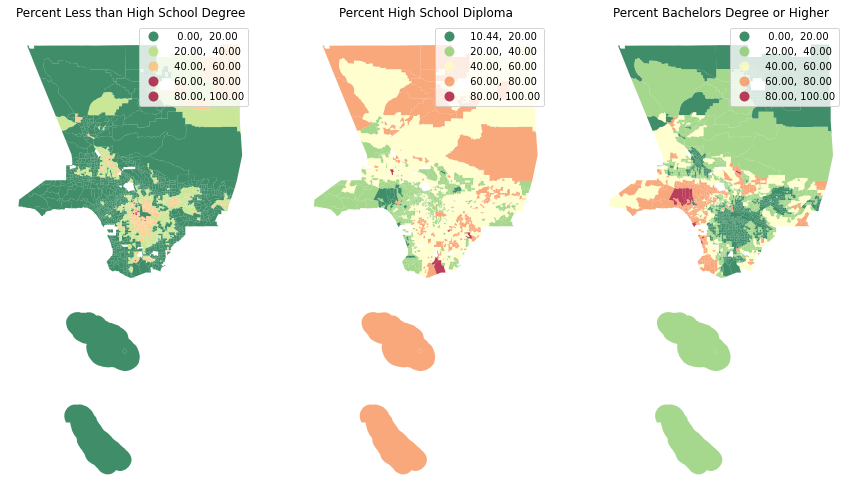

In [46]:
fig, axs = plt.subplots(1, 3, figsize=(15, 12))

ax1, ax2, ax3 = axs

gdf.plot(column='Percent Less than High School', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]}, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True
        )

ax1.axis("off")
ax1.set_title("Percent Less than High School Degree")

gdf.plot(column='Percent High School Diploma', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent High School Diploma")

gdf.plot(column='Percent Bachelors Degree or Higher', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]}, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax3,
            legend=True
        )

ax3.axis("off")
ax3.set_title("Percent Bachelors Degree or Higher")